##**Baca Dataset**

In [ ]:
#install library sklearn jika waktu import library error
#!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import boxcox, levene, bartlett, norm, kstest
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df = pd.read_excel('https://github.com/Adkurrr/Tugas-Analisis-Deret-Waktu/blob/main/8.%20Data%20Jumlah%20kendaraan%20perempatan.xlsx?raw=true')
df

,Waktu (Harian),Jumlah Kendaraan
0,1,1559
1,2,1041
2,3,1039
3,4,4328
4,5,4747
...,...,...
725,726,2326
726,727,4660
727,728,2206
728,729,1009


##**Plot Dataset**

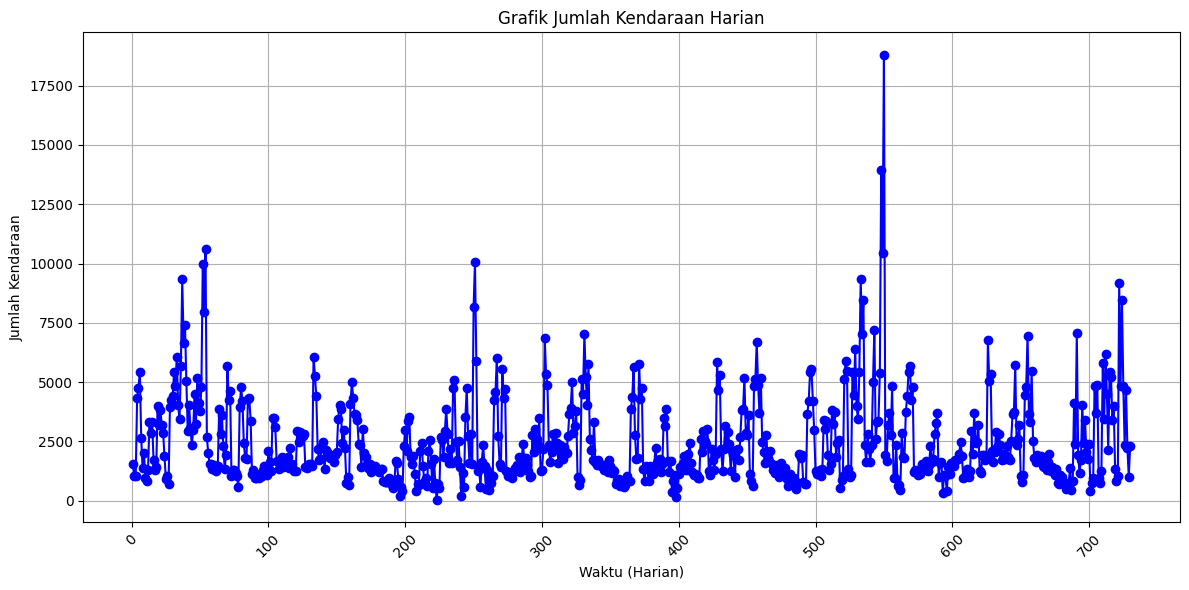

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Waktu (Harian)'], df['Jumlah Kendaraan'], marker='o', linestyle='-', color='b')
plt.title('Grafik Jumlah Kendaraan Harian')
plt.xlabel('Waktu (Harian)')
plt.ylabel('Jumlah Kendaraan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

## **Memeriksa Kestasioneran data terhadap Variansi dan Mean dengan Box-Cox dan Uji Augmented Dickey-Fuller (ADF)**

In [ ]:
# Transformasi Box-Cox
transformed_data, lambda_value = boxcox(df['Jumlah Kendaraan'])

# Uji ADF untuk stasioneritas
adf_statistic, p_value, _, _, critical_values, _ = adfuller(transformed_data)
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpretasi hasil
if p_value <= 0.05:
    print('Hasil uji menunjukkan data setelah transformasi Box-Cox bersifat stasioner.')
else:
    print('Hasil uji menunjukkan data setelah transformasi Box-Cox tidak bersifat stasioner.')

ADF Statistic: -3.725372391788625
p-value: 0.003770097335578154
Critical Values:
   1%: -3.439593802573824
   5%: -2.865619356068967
   10%: -2.568942332870462
Hasil uji menunjukkan data setelah transformasi Box-Cox bersifat stasioner.


Dalam uji Augmented Dickey-Fuller (ADF)

- H0 = data memiliki akar unit, yang berarti data tidak stasioner.
- H1 = data tidak memiliki akar unit yang berarti data stasioner.

Dalam data diatas, ADF Statistic (-3.7644594780156355) kurang dari nilai kritis pada tingkat kepercayaan 1% (-3.4395677423210493). Selain itu, p-value (0.003292605869780964) lebih kecil dari tingkat signifikansi 0.01 (tingkat kepercayaan 99%) yang berarti tolak H0. Oleh karena itu, data tidak memiliki akar unit yang berarti data stasioner.

##**Plot ACF dan PACF**

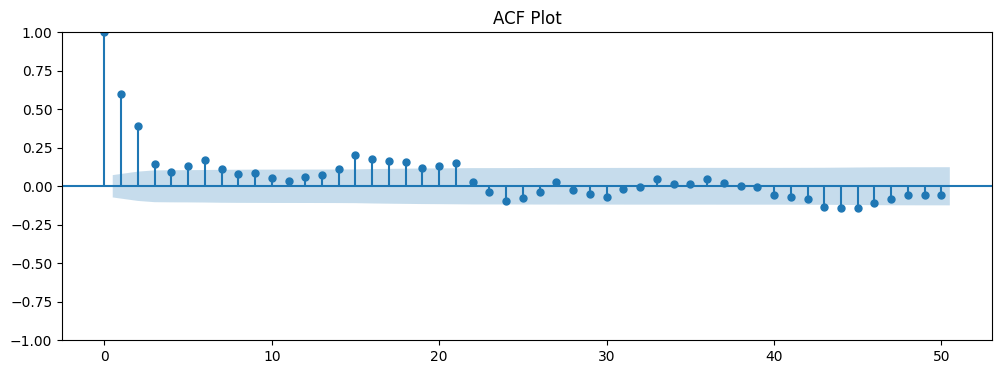

In [ ]:
plt.figure(figsize=(12, 4))
plot_acf(df['Jumlah Kendaraan'], lags=50, ax=plt.gca())
plt.title('ACF Plot')
plt.show()

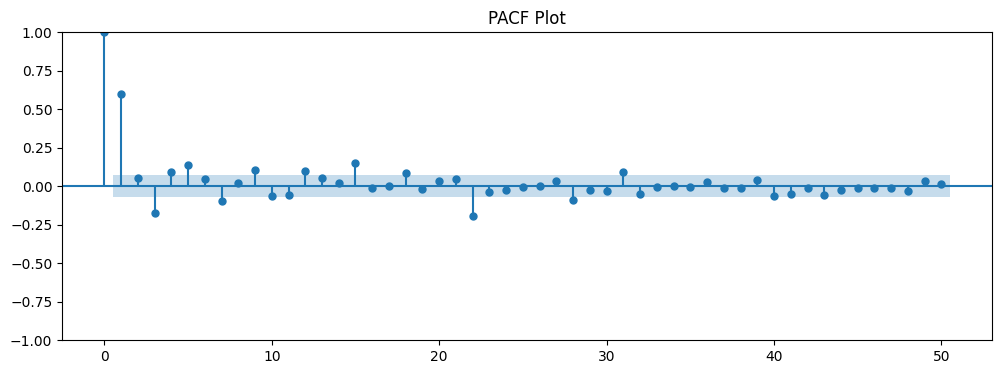

In [ ]:
plt.figure(figsize=(12, 4))
plot_pacf(df['Jumlah Kendaraan'], lags=50, ax=plt.gca())
plt.title('PACF Plot')
plt.show()

pada plot ACF nilai autokorelasi memotong batas pada lag 1, 2, 3, 6, 15, 16, 17, 18, 21. sedangkan pada plot PACF nilai autokorelasi memotong pada batas 1, 3, 5, 7, 9, 15, 22.

##**Mencari Model ARMA Terbaik**





In [ ]:
# Menggunakan model ARMA(1,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,1))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,2)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,2))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,3)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,3))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,6)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,6))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,15)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,15))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,16)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,16))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,17)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,17))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,18)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,18))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(1,21)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,21))
results_1 = model.fit()
print(results_1.summary())

                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6366.167
Date:                Wed, 27 Dec 2023   AIC                          12740.334
Time:                        13:06:16   BIC                          12758.706
Sample:                             0   HQIC                         12747.422
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    194.591     12.513      0.000    2053.545    2816.329
ar.L1          0.6347      0.028     22.979      0.000       0.581       0.689
ma.L1         -0.0553      0.047     -1.171      0.2

In [ ]:
# Menggunakan model ARMA(3,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,1))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,2)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,2))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,3)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,3))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,6)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,6))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,15)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,15))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,16)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,16))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,17)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,17))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,18)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,18))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(3,21)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(3,0,21))
results_1 = model.fit()
print(results_1.summary())

                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -6353.414
Date:                Wed, 27 Dec 2023   AIC                          12718.828
Time:                        13:07:31   BIC                          12746.386
Sample:                             0   HQIC                         12729.460
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    174.750     13.934      0.000    2092.433    2777.441
ar.L1          0.3650      0.177      2.060      0.039       0.018       0.712
ar.L2          0.2735      0.104      2.618      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(3, 0, 15)   Log Likelihood               -6317.397
Date:                Wed, 27 Dec 2023   AIC                          12674.794
Time:                        13:07:47   BIC                          12766.655
Sample:                             0   HQIC                         12710.235
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9374    242.832     10.027      0.000    1958.996    2910.879
ar.L1          0.7857      0.116      6.758      0.000       0.558       1.014
ar.L2          0.6791      0.110      6.182      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(3, 0, 16)   Log Likelihood               -6317.017
Date:                Wed, 27 Dec 2023   AIC                          12676.033
Time:                        13:08:02   BIC                          12772.487
Sample:                             0   HQIC                         12713.246
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9388    259.440      9.385      0.000    1926.446    2943.431
ar.L1          0.3741      0.222      1.688      0.092      -0.060       0.809
ar.L2          0.7425      0.104      7.144      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(3, 0, 17)   Log Likelihood               -6309.742
Date:                Wed, 27 Dec 2023   AIC                          12663.484
Time:                        13:08:17   BIC                          12764.531
Sample:                             0   HQIC                         12702.468
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    270.153      9.013      0.000    1905.447    2964.427
ar.L1          0.3834      0.157      2.445      0.014       0.076       0.691
ar.L2         -0.3555      0.155     -2.290      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(3, 0, 21)   Log Likelihood               -6298.549
Date:                Wed, 27 Dec 2023   AIC                          12649.098
Time:                        13:09:02   BIC                          12768.517
Sample:                             0   HQIC                         12695.171
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    255.447      9.532      0.000    1934.271    2935.603
ar.L1          0.2315      0.091      2.544      0.011       0.053       0.410
ar.L2          0.2111      0.120      1.758      0.0

In [ ]:
# Menggunakan model ARMA(5,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,1))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,2)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,2))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,3)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,3))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,6)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,6))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,15)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,15))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,16)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,16))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,17)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,17))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,18)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,18))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(5,21)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(5,0,21))
results_1 = model.fit()
print(results_1.summary())


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -6343.891
Date:                Wed, 27 Dec 2023   AIC                          12703.781
Time:                        13:09:02   BIC                          12740.525
Sample:                             0   HQIC                         12717.957
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    214.286     11.363      0.000    2014.944    2854.930
ar.L1          0.7247      0.246      2.941      0.003       0.242       1.208
ar.L2          0.0828      0.148      0.558      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -6337.373
Date:                Wed, 27 Dec 2023   AIC                          12694.747
Time:                        13:09:09   BIC                          12740.677
Sample:                             0   HQIC                         12712.467
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    180.025     13.526      0.000    2082.095    2787.779
ar.L1         -0.2849      0.390     -0.731      0.465      -1.049       0.479
ar.L2         -0.2127      0.197     -1.082      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(5, 0, 6)   Log Likelihood               -6317.334
Date:                Wed, 27 Dec 2023   AIC                          12660.668
Time:                        13:09:13   BIC                          12720.378
Sample:                             0   HQIC                         12683.705
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9372    280.478      8.681      0.000    1885.211    2984.663
ar.L1          1.0829      0.109      9.951      0.000       0.870       1.296
ar.L2         -0.1934      0.069     -2.786      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(5, 0, 15)   Log Likelihood               -6307.905
Date:                Wed, 27 Dec 2023   AIC                          12659.810
Time:                        13:09:27   BIC                          12760.857
Sample:                             0   HQIC                         12698.795
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9372    241.135     10.098      0.000    1962.322    2907.553
ar.L1          1.0677      0.602      1.773      0.076      -0.113       2.248
ar.L2         -0.3386      0.519     -0.652      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(5, 0, 16)   Log Likelihood               -6308.358
Date:                Wed, 27 Dec 2023   AIC                          12662.717
Time:                        13:09:44   BIC                          12768.357
Sample:                             0   HQIC                         12703.473
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9373    219.210     11.108      0.000    2005.294    2864.581
ar.L1          0.1635      0.301      0.543      0.587      -0.427       0.754
ar.L2          0.5240      0.249      2.104      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(5, 0, 17)   Log Likelihood               -6303.371
Date:                Wed, 27 Dec 2023   AIC                          12654.741
Time:                        13:10:01   BIC                          12764.974
Sample:                             0   HQIC                         12697.270
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    298.010      8.171      0.000    1850.848    3019.026
ar.L1          0.7881      0.100      7.896      0.000       0.592       0.984
ar.L2         -0.8485      0.075    -11.377      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(5, 0, 18)   Log Likelihood               -6302.994
Date:                Wed, 27 Dec 2023   AIC                          12655.988
Time:                        13:10:23   BIC                          12770.814
Sample:                             0   HQIC                         12700.288
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    308.680      7.888      0.000    1829.936    3039.938
ar.L1          0.7969      0.148      5.370      0.000       0.506       1.088
ar.L2         -0.8630      0.077    -11.139      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(5, 0, 21)   Log Likelihood               -6297.947
Date:                Wed, 27 Dec 2023   AIC                          12651.893
Time:                        13:10:50   BIC                          12780.498
Sample:                             0   HQIC                         12701.510
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9372    263.991      9.224      0.000    1917.524    2952.350
ar.L1          0.1726      0.185      0.931      0.352      -0.191       0.536
ar.L2          0.3520      0.224      1.575      0.1

In [ ]:
# Menggunakan model ARMA(7,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,1))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,2)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,2))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,3)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,3))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,6)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,6))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,15)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,15))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,16)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,16))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,17)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,17))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,18)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,18))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(7,21)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(7,0,21))
results_1 = model.fit()
print(results_1.summary())


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -6339.979
Date:                Wed, 27 Dec 2023   AIC                          12699.958
Time:                        13:10:51   BIC                          12745.889
Sample:                             0   HQIC                         12717.678
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    200.547     12.141      0.000    2041.871    2828.003
ar.L1          0.5010      0.427      1.173      0.241      -0.336       1.338
ar.L2          0.2234      0.243      0.921      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(7, 0, 2)   Log Likelihood               -6320.391
Date:                Wed, 27 Dec 2023   AIC                          12662.782
Time:                        13:10:54   BIC                          12713.306
Sample:                             0   HQIC                         12682.275
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    252.778      9.633      0.000    1939.500    2930.373
ar.L1         -0.3605      0.033    -10.811      0.000      -0.426      -0.295
ar.L2         -0.1870      0.025     -7.366      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(7, 0, 3)   Log Likelihood               -6323.273
Date:                Wed, 27 Dec 2023   AIC                          12670.547
Time:                        13:10:58   BIC                          12725.663
Sample:                             0   HQIC                         12691.811
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    307.675      7.914      0.000    1831.905    3037.969
ar.L1          0.5632      0.121      4.662      0.000       0.326       0.800
ar.L2          0.0828      0.046      1.809      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -6319.208
Date:                Wed, 27 Dec 2023   AIC                          12668.416
Time:                        13:11:06   BIC                          12737.312
Sample:                             0   HQIC                         12694.997
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9374    397.492      6.126      0.000    1655.867    3214.008
ar.L1          0.1835      0.383      0.479      0.632      -0.568       0.935
ar.L2         -0.2310      0.102     -2.274      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(7, 0, 15)   Log Likelihood               -6301.825
Date:                Wed, 27 Dec 2023   AIC                          12651.650
Time:                        13:11:20   BIC                          12761.883
Sample:                             0   HQIC                         12694.179
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    228.118     10.674      0.000    1987.835    2882.039
ar.L1          0.8801      0.066     13.381      0.000       0.751       1.009
ar.L2         -0.0082      0.072     -0.114      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(7, 0, 16)   Log Likelihood               -6301.524
Date:                Wed, 27 Dec 2023   AIC                          12653.049
Time:                        13:11:38   BIC                          12767.875
Sample:                             0   HQIC                         12697.349
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    231.514     10.517      0.000    1981.178    2888.696
ar.L1          0.8700      0.090      9.706      0.000       0.694       1.046
ar.L2         -0.0230      0.083     -0.276      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(7, 0, 17)   Log Likelihood               -6297.253
Date:                Wed, 27 Dec 2023   AIC                          12646.506
Time:                        13:11:56   BIC                          12765.925
Sample:                             0   HQIC                         12692.579
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    241.843     10.068      0.000    1960.933    2908.941
ar.L1          0.7361      0.125      5.887      0.000       0.491       0.981
ar.L2         -0.1152      0.125     -0.922      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(7, 0, 18)   Log Likelihood               -6297.106
Date:                Wed, 27 Dec 2023   AIC                          12648.211
Time:                        13:12:19   BIC                          12772.223
Sample:                             0   HQIC                         12696.056
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    245.027      9.937      0.000    1954.694    2915.180
ar.L1          0.7447      0.150      4.978      0.000       0.451       1.038
ar.L2         -0.1053      0.114     -0.927      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(7, 0, 21)   Log Likelihood               -6296.358
Date:                Wed, 27 Dec 2023   AIC                          12652.716
Time:                        13:12:47   BIC                          12790.507
Sample:                             0   HQIC                         12705.877
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    249.950      9.742      0.000    1945.044    2924.830
ar.L1          0.7258      0.186      3.911      0.000       0.362       1.089
ar.L2         -0.1134      0.128     -0.884      0.3

In [ ]:
# Menggunakan model ARMA(9,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,1))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,2)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,2))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,3)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,3))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,6)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,6))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,15)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,15))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,16)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,16))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,17)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,17))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,18)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,18))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(9,21)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(9,0,21))
results_1 = model.fit()
print(results_1.summary())


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(9, 0, 1)   Log Likelihood               -6334.966
Date:                Wed, 27 Dec 2023   AIC                          12693.932
Time:                        13:12:48   BIC                          12749.049
Sample:                             0   HQIC                         12715.197
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    228.889     10.638      0.000    1986.322    2883.552
ar.L1          0.3549      0.288      1.232      0.218      -0.210       0.919
ar.L2          0.3173      0.161      1.973      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(9, 0, 2)   Log Likelihood               -6319.107
Date:                Wed, 27 Dec 2023   AIC                          12664.214
Time:                        13:12:53   BIC                          12723.924
Sample:                             0   HQIC                         12687.250
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    235.251     10.350      0.000    1973.853    2896.022
ar.L1         -0.3529      0.038     -9.261      0.000      -0.428      -0.278
ar.L2         -0.1617      0.031     -5.189      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(9, 0, 3)   Log Likelihood               -6318.059
Date:                Wed, 27 Dec 2023   AIC                          12664.118
Time:                        13:13:01   BIC                          12728.421
Sample:                             0   HQIC                         12688.927
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    277.572      8.772      0.000    1890.906    2978.968
ar.L1          0.4726      0.193      2.444      0.015       0.094       0.852
ar.L2          0.1206      0.078      1.540      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(9, 0, 6)   Log Likelihood               -6315.470
Date:                Wed, 27 Dec 2023   AIC                          12664.941
Time:                        13:13:07   BIC                          12743.022
Sample:                             0   HQIC                         12695.065
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    348.481      6.987      0.000    1751.927    3117.947
ar.L1          0.0608      0.199      0.305      0.760      -0.330       0.451
ar.L2          0.2395      0.151      1.581      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(9, 0, 15)   Log Likelihood               -6297.556
Date:                Wed, 27 Dec 2023   AIC                          12647.113
Time:                        13:13:22   BIC                          12766.532
Sample:                             0   HQIC                         12693.186
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    258.915      9.404      0.000    1927.472    2942.402
ar.L1          0.8013      0.269      2.984      0.003       0.275       1.328
ar.L2          0.5639      0.432      1.306      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(9, 0, 16)   Log Likelihood               -6296.334
Date:                Wed, 27 Dec 2023   AIC                          12646.669
Time:                        13:13:42   BIC                          12770.681
Sample:                             0   HQIC                         12694.514
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    280.301      8.687      0.000    1885.558    2984.316
ar.L1          0.9070      0.338      2.683      0.007       0.244       1.569
ar.L2          0.5264      0.469      1.124      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(9, 0, 17)   Log Likelihood               -6297.072
Date:                Wed, 27 Dec 2023   AIC                          12650.144
Time:                        13:14:03   BIC                          12778.749
Sample:                             0   HQIC                         12699.761
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    252.536      9.642      0.000    1939.976    2929.898
ar.L1          0.7773      0.365      2.127      0.033       0.061       1.494
ar.L2         -0.0036      0.598     -0.006      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(9, 0, 18)   Log Likelihood               -6296.902
Date:                Wed, 27 Dec 2023   AIC                          12651.803
Time:                        13:14:28   BIC                          12785.002
Sample:                             0   HQIC                         12703.192
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    247.794      9.826      0.000    1949.270    2920.604
ar.L1          0.6901      3.059      0.226      0.822      -5.306       6.686
ar.L2          0.0231      2.030      0.011      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(9, 0, 21)   Log Likelihood               -6296.072
Date:                Wed, 27 Dec 2023   AIC                          12656.143
Time:                        13:14:58   BIC                          12803.121
Sample:                             0   HQIC                         12712.848
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    241.079     10.100      0.000    1962.432    2907.442
ar.L1          0.5481      1.061      0.516      0.606      -1.532       2.628
ar.L2          0.2912      1.491      0.195      0.8

In [ ]:
# Menggunakan model ARMA(15,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,1))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,2)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,2))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,3)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,3))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,6)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,6))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,15)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,15))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,16)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,16))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,17)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,17))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,18)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,18))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(15,21)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(15,0,21))
results_1 = model.fit()
print(results_1.summary())


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(15, 0, 1)   Log Likelihood               -6318.928
Date:                Wed, 27 Dec 2023   AIC                          12673.857
Time:                        13:15:02   BIC                          12756.531
Sample:                             0   HQIC                         12705.753
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    289.121      8.422      0.000    1868.270    3001.604
ar.L1          0.4978      0.169      2.941      0.003       0.166       0.830
ar.L2          0.2395      0.104      2.299      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(15, 0, 2)   Log Likelihood               -6312.286
Date:                Wed, 27 Dec 2023   AIC                          12662.571
Time:                        13:15:17   BIC                          12749.839
Sample:                             0   HQIC                         12696.240
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9379    271.929      8.954      0.000    1901.967    2967.909
ar.L1         -0.2975      0.065     -4.597      0.000      -0.424      -0.171
ar.L2         -0.1267      0.049     -2.574      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(15, 0, 3)   Log Likelihood               -6310.026
Date:                Wed, 27 Dec 2023   AIC                          12660.051
Time:                        13:15:32   BIC                          12751.912
Sample:                             0   HQIC                         12695.492
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9372    351.969      6.918      0.000    1745.090    3124.784
ar.L1          0.3450      0.134      2.573      0.010       0.082       0.608
ar.L2          0.0828      0.068      1.215      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(15, 0, 6)   Log Likelihood               -6303.030
Date:                Wed, 27 Dec 2023   AIC                          12652.059
Time:                        13:15:47   BIC                          12757.699
Sample:                             0   HQIC                         12692.816
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    340.080      7.160      0.000    1768.394    3101.481
ar.L1          0.4462      0.145      3.081      0.002       0.162       0.730
ar.L2          0.1517      0.082      1.858      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(15, 0, 15)   Log Likelihood               -6288.260
Date:                Wed, 27 Dec 2023   AIC                          12640.521
Time:                        13:16:05   BIC                          12787.498
Sample:                             0   HQIC                         12697.226
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    314.564      7.741      0.000    1818.403    3051.471
ar.L1          0.7099      0.960      0.739      0.460      -1.172       2.591
ar.L2          0.2456      0.967      0.254      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(15, 0, 16)   Log Likelihood               -6286.923
Date:                Wed, 27 Dec 2023   AIC                          12639.845
Time:                        13:16:29   BIC                          12791.416
Sample:                             0   HQIC                         12698.322
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    327.519      7.434      0.000    1793.012    3076.862
ar.L1          0.5083      0.251      2.024      0.043       0.016       1.001
ar.L2         -0.0855      0.168     -0.508      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(15, 0, 17)   Log Likelihood               -6286.190
Date:                Wed, 27 Dec 2023   AIC                          12640.380
Time:                        13:16:54   BIC                          12796.544
Sample:                             0   HQIC                         12700.629
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    339.645      7.169      0.000    1769.244    3100.630
ar.L1          0.5076      0.204      2.490      0.013       0.108       0.907
ar.L2         -0.0403      0.216     -0.186      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(15, 0, 18)   Log Likelihood               -6285.272
Date:                Wed, 27 Dec 2023   AIC                          12640.544
Time:                        13:17:23   BIC                          12801.300
Sample:                             0   HQIC                         12702.565
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    305.864      7.961      0.000    1835.454    3034.420
ar.L1          0.3991      0.466      0.856      0.392      -0.515       1.313
ar.L2          0.0075      0.298      0.025      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(15, 0, 21)   Log Likelihood               -6284.702
Date:                Wed, 27 Dec 2023   AIC                          12645.403
Time:                        13:17:57   BIC                          12819.939
Sample:                             0   HQIC                         12712.740
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    295.938      8.228      0.000    1854.910    3014.964
ar.L1          0.5841      0.588      0.993      0.320      -0.568       1.737
ar.L2          0.2765      0.575      0.481      0.6

In [ ]:
# Menggunakan model ARMA(21,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,1))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,2)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,2))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,3)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,3))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,6)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,6))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,15)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,15))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,16)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,16))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,17)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,17))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,18)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,18))
results_1 = model.fit()
print(results_1.summary())

# Menggunakan model ARMA(21,21)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(21,0,21))
results_1 = model.fit()
print(results_1.summary())


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(21, 0, 1)   Log Likelihood               -6306.681
Date:                Wed, 27 Dec 2023   AIC                          12661.362
Time:                        13:18:17   BIC                          12771.595
Sample:                             0   HQIC                         12703.890
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9373    342.618      7.107      0.000    1763.417    3106.457
ar.L1         -0.2955      0.078     -3.806      0.000      -0.448      -0.143
ar.L2          0.6992      0.051     13.612      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(21, 0, 3)   Log Likelihood               -6300.708
Date:                Wed, 27 Dec 2023   AIC                          12653.417
Time:                        13:19:06   BIC                          12772.836
Sample:                             0   HQIC                         12699.490
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9374    341.618      7.128      0.000    1765.379    3104.495
ar.L1         -0.6962      0.184     -3.779      0.000      -1.057      -0.335
ar.L2         -0.0854      0.183     -0.468      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                ARIMA(21, 0, 6)   Log Likelihood               -6294.289
Date:                Wed, 27 Dec 2023   AIC                          12646.579
Time:                        13:19:34   BIC                          12779.777
Sample:                             0   HQIC                         12697.968
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9372    345.674      7.044      0.000    1757.429    3112.446
ar.L1         -0.2152      0.303     -0.709      0.478      -0.810       0.380
ar.L2         -0.0801      0.158     -0.506      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(21, 0, 15)   Log Likelihood               -6289.072
Date:                Wed, 27 Dec 2023   AIC                          12654.143
Time:                        13:20:07   BIC                          12828.679
Sample:                             0   HQIC                         12721.480
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    286.681      8.494      0.000    1873.053    2996.821
ar.L1          0.6732      0.643      1.047      0.295      -0.586       1.933
ar.L2         -0.1105      0.233     -0.475      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(21, 0, 16)   Log Likelihood               -6283.462
Date:                Wed, 27 Dec 2023   AIC                          12644.923
Time:                        13:20:40   BIC                          12824.052
Sample:                             0   HQIC                         12714.032
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    297.081      8.196      0.000    1852.669    3017.205
ar.L1          0.8158      2.575      0.317      0.751      -4.230       5.862
ar.L2         -0.2652      0.876     -0.303      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(21, 0, 17)   Log Likelihood               -6281.464
Date:                Wed, 27 Dec 2023   AIC                          12642.929
Time:                        13:21:18   BIC                          12826.651
Sample:                             0   HQIC                         12713.810
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    281.791      8.641      0.000    1882.636    2987.238
ar.L1          0.3079      0.259      1.187      0.235      -0.200       0.816
ar.L2          0.0465      0.296      0.157      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(21, 0, 18)   Log Likelihood               -6280.901
Date:                Wed, 27 Dec 2023   AIC                          12643.802
Time:                        13:21:56   BIC                          12832.117
Sample:                             0   HQIC                         12716.455
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    296.635      8.209      0.000    1853.543    3016.331
ar.L1          0.4987      0.389      1.282      0.200      -0.264       1.261
ar.L2          0.0346      0.279      0.124      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:               ARIMA(21, 0, 21)   Log Likelihood               -6280.946
Date:                Wed, 27 Dec 2023   AIC                          12649.893
Time:                        13:22:36   BIC                          12851.987
Sample:                             0   HQIC                         12727.862
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9371    293.507      8.296      0.000    1859.674    3010.200
ar.L1          0.8444      3.535      0.239      0.811      -6.083       7.772
ar.L2          0.6068      0.736      0.825      0.4

pada hasil perhitungan ARMA diatas didapatkan nilai AIC sebagai berikut:



ARMA(1,1) = 12740.334

ARMA(1,2) = 12705.864

ARMA(1,3) = 12700.249

ARMA(1,6) = 12686.539

ARMA(1,15) = 12674.690

ARMA(1,16) = 12676.665

ARMA(1,17) = 12671.823

ARMA(1,18) = 12667.071

ARMA(1,21) = 12659.552

ARMA(3,1) = 12718.828

ARMA(3,2) = 12691.522

ARMA(3,3) = 12688.912

ARMA(3,6) = 12685.795

ARMA(3,15) = 12674.794

ARMA(3,16) = 12676.046

ARMA(3,17) = 12663.484

ARMA(3,18) = 12663.046

ARMA(3,21) = 12649.098

ARMA(5,1) = 12703.781

ARMA(5,2) = 12693.915

ARMA(5,3) = 12694.747

ARMA(5,6) = 12660.670

ARMA(5,15) = 12659.756

ARMA(5,16) = 12662.717

ARMA(5,17) = 12654.740

ARMA(5,18) = 12656.013

ARMA(5,21) = 12651.893

ARMA(7,1) = 12699.958

ARMA(7,2) = 12662.619

ARMA(7,3) = 12670.547

ARMA(7,6) = 12669.109

ARMA(7,15) = 12651.650

ARMA(7,16) = 12653.054

ARMA(7,17) = 12646.506

ARMA(7,18) = 12648.211

ARMA(7,21) = 12652.725

ARMA(9,1) = 12693.932

ARMA(9,2) = 12664.145

ARMA(9,3) = 12664.143

ARMA(9,6) = 12665.675

ARMA(9,15) = 12647.113

ARMA(9,16) = 12646.689

ARMA(9,17) = 12650.143

ARMA(9,18) = 12651.813

ARMA(9,21) = 12656.143

ARMA(15,1) = 12673.857

ARMA(15,2) = 12662.534

ARMA(15,3) = 12660.010

ARMA(15,6) = 12652.070

ARMA(15,15) = 12640.529

ARMA(15,16) = 12640.022

ARMA(15,17) = 12640.379

ARMA(15,18) = 12640.541

ARMA(15,21) = 12645.402

ARMA(22,1) = 12661.362

ARMA(22,2) = 12659.427

ARMA(22,3) = 12653.421

ARMA(22,6) = 12646.572

ARMA(22,15) = 12654.147

ARMA(22,16) = 12644.917

ARMA(22,17) = 12642.929

ARMA(22,18) = 12643.802

ARMA(22,21) = 12649.903




Model yang terbaik merupakan model yang mempunyai nilai AIC terkecil. Oleh karena itu, model terbaik berada pada model ARMA(15,16)

# **Maximum likelihood**

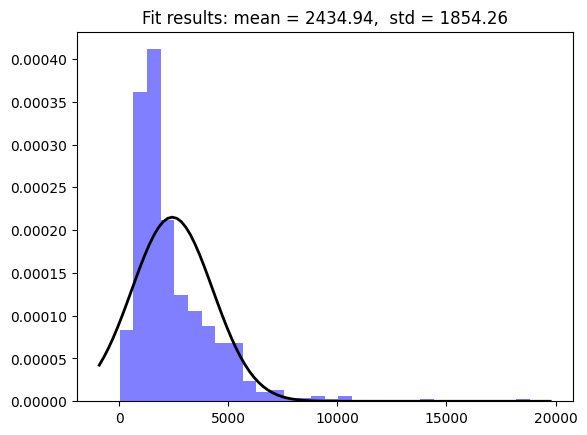

In [ ]:
# Assuming df['Jumlah Kendaraan'] is your data
data = df['Jumlah Kendaraan'].dropna().values

# Define the negative log-likelihood function for a normal distribution
def neg_log_likelihood(params, data):
    mean, std_dev = params
    log_likelihood = -np.sum(norm.logpdf(data, loc=mean, scale=std_dev))
    return log_likelihood

# Initial parameter values
initial_params = [np.mean(data), np.std(data)]

# Use scipy.optimize to maximize the log-likelihood
result = minimize(neg_log_likelihood, initial_params, args=(data,))
mean_mle, std_dev_mle = result.x

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_mle, std_dev_mle)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Fit results: mean = %.2f,  std = %.2f' % (mean_mle, std_dev_mle))
plt.show()

Dari hasil analisis Maximum Likelihood Estimation (MLE) pada data 'Jumlah Kendaraan', diperoleh estimasi parameter distribusi normal sebagai berikut:

1. **Rata-rata (Mean):** Estimasi rata-rata data adalah sekitar 2434.94.

2. **Deviasi Standar (Standard Deviation):** Estimasi deviasi standar data adalah sekitar 1854.26.

Interpretasi dari hasil ini adalah bahwa, dengan asumsi distribusi normal, rata-rata 'Jumlah Kendaraan' diperkirakan berada di sekitar 2434.94, dan deviasi standarnya sekitar 1854.26.

##**Pengujian Kelayakan Model Menggunakan Ljung-Box**


In [ ]:
# Rename columns to match the example data
df.rename(columns={'Waktu (Harian)':'TIME', 'Jumlah Kendaraan':'SUNACTIVITY'}, inplace=True)

# Fit ARIMA model to dataset
model = sm.tsa.ARIMA(df['SUNACTIVITY'], order=(15, 0, 16))
res = model.fit()

# Perform Ljung-Box test on residuals with lag=1
lb_test = sm.stats.acorr_ljungbox(res.resid, lags=[1], return_df=True)

# Print the result
print(lb_test)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    lb_stat  lb_pvalue
1  0.022703   0.880231


Berdasarkan nilai lb_start dan lb_pvalue yang diberikan:


*   Nilai lb_start yang sangat kecil mungkin menunjukkan bahwa residual model memiliki sedikit korelasi spasial.
*   Nilai lb_pvalue yang tinggi (0.848756) menunjukkan bahwa tidak ada cukup bukti untuk menolak hipotesis nol, yang dapat diartikan bahwa residual mungkin bebas dari korelasi spasial yang signifikan.

jadi dari informasi diatas, model tersebut mungkin layak atau memiliki kelayakan.





# **kolmogorov smirnov**

In [ ]:
df = pd.read_excel('https://github.com/Adkurrr/Tugas-Analisis-Deret-Waktu/blob/main/8.%20Data%20Jumlah%20kendaraan%20perempatan.xlsx?raw=true')
df

# Extract the last column from the DataFrame
data = df['Jumlah Kendaraan'].dropna().values

# Estimate mean and standard deviation from the sample data
mean_estimate = np.mean(data)
std_dev_estimate = np.std(data)

# Perform Kolmogorov-Smirnov test
statistic, p_value = kstest(data, 'norm', args=(mean_estimate, std_dev_estimate))

# Output the test statistic and p-value
print(f"KS Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the p-value to determine the significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The distributions are different.")
else:
    print("Fail to reject the null hypothesis. The distributions are similar.")

KS Statistic: 0.1550532969908368
P-value: 8.590053538740678e-16
Reject the null hypothesis. The distributions are different.


Hasil analisis Kolmogorov-Smirnov test pada data 'Jumlah Kendaraan' adalah sebagai berikut:

- KS Statistic: 0.155
- P-value: 8.59e-16

Dengan melihat hasil ini, kita dapat membuat beberapa kesimpulan:

1. **KS Statistic:** Nilai statistik uji KS sekitar 0.155. Nilai ini menunjukkan adanya deviasi antara distribusi kumulatif empiris dari data dengan distribusi kumulatif normal yang diuji.

2. **P-value:** P-value sangat kecil (8.59e-16), menunjukkan bahwa perbedaan antara distribusi data yang diamati dengan distribusi normal yang diuji adalah signifikan.

3. **Kesimpulan:** Karena p-value sangat kecil, kita dapat menolak hipotesis nol. Artinya, kita memiliki bukti yang cukup untuk menyatakan bahwa distribusi data 'Jumlah Kendaraan' tidak mengikuti distribusi normal.

# **RMSE**

In [ ]:
df = pd.read_excel('https://github.com/Adkurrr/Tugas-Analisis-Deret-Waktu/blob/main/8.%20Data%20Jumlah%20kendaraan%20perempatan.xlsx?raw=true')
df

# Using 'Waktu (Harian)' as the index
df.set_index('Waktu (Harian)', inplace=True)

# Features and target
features = df.iloc[:,0].values
target = df['Jumlah Kendaraan'].values

# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# Converting train_target to a NumPy array
train_target_array = train_target.reshape(-1,1)
train_features = train_features.reshape(-1,1)

# Creating and training the model
model = RandomForestRegressor()
model.fit(train_features, train_target_array)

# Making predictions
predictions = model.predict(test_features.reshape(-1,1))

# Calculating RMSE
rmse = sqrt(mean_squared_error(test_target, predictions))
print(f"RMSE: {rmse}")

<ipython-input-62-8683b3768f13>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_features, train_target_array)


RMSE: 16.126312710717087



Analisis RMSE :

Nilai Root Mean Square Error (RMSE) sebesar 16,13 menunjukkan rata-rata magnitudo dari selisih antara nilai prediksi dan nilai observasi dalam satuan variabel target 'Jumlah Kendaraan'. Secara kuantitatif, ini berarti rata-rata kesalahan prediksi model tersebut sekitar 16,13 unit 'Jumlah Kendaraan'. Penilaian terhadap besarnya kesalahan ini sangat tergantung pada skala nilai variabel target, di mana RMSE yang lebih rendah umumnya dianggap lebih baik. Jika nilai 'Jumlah Kendaraan' relatif kecil, RMSE 16,13 mungkin dianggap tinggi, dan sebaliknya jika nilainya besar. Penting untuk membandingkan RMSE dengan rentang variabel target untuk menilai signifikansinya. Apabila RMSE dianggap tinggi untuk aplikasi tertentu, disarankan untuk menjelajahi model lain, teknik rekayasa fitur, atau penyesuaian hyperparameter untuk meningkatkan kinerja prediktif. Selain itu, visualisasi nilai prediksi dibandingkan dengan nilai sebenarnya dapat memberikan wawasan lebih lanjut terkait dengan pola kesalahan model.